In [ ]:
# Get the data here (needs login): https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [2]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [3]:
# After reading the data, it also cleans the data for you
# But this step doesn't deal with missing data, it just tells you top sparse features

df = Reader(sep=",").train_test_split(['train.csv', 'test.csv'], 'Item_Outlet_Sales')


reading csv : train.csv ...
cleaning data...
CPU time: 1.5729589462280273 seconds

reading csv : test.csv ...
cleaning data...
CPU time: 0.14525485038757324 seconds

number of common features : 11

gathering and crunching for train and test datasets
reindexing for train and test datasets
dropping training duplicates
dropping constant variables on training set

number of categorical features : 7
number of numerical features : 4
number of training samples : 8523
number of test samples : 5681

Top sparse features (% missing values on train set):
Outlet_Size    28.3
Item_Weight    17.2
dtype: float64

task : regression


In [13]:
df['train']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.300,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,Soft Drinks,0.019278,5.920,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.500,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,Fruits and Vegetables,0.000000,19.200,1998.0,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,Household,0.000000,8.930,1987.0,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,Baking Goods,0.000000,10.395,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,Snack Foods,0.012741,13.650,1987.0,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,Snack Foods,0.127470,NaN,1985.0,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,Frozen Foods,0.016687,16.200,2002.0,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,Frozen Foods,0.094450,19.200,2007.0,OUT017,Tier 2,NaN,Supermarket Type1


In [14]:
# Deal with missing data
import numpy as np 

df['train']['Item_Weight'] = df['train']['Item_Weight'].fillna(np.nanmedian(df['train']['Item_Weight']))
df['train']['Outlet_Size'] = df['train']['Outlet_Size'].fillna(df['train']['Outlet_Size'].mode().iloc[0])

df['test']['Item_Weight'] = df['test']['Item_Weight'].fillna(np.nanmedian(df['test']['Item_Weight']))
df['test']['Outlet_Size'] = df['test']['Outlet_Size'].fillna(df['test']['Outlet_Size'].mode().iloc[0])

In [16]:
df['train']['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [17]:
# It automatically detect and remove shifting features

df=Drift_thresholder().fit_transform(df)  # 0.8 is the default shifting threshold


computing drifts...
CPU time: 0.6470849514007568 seconds

Top 10 drifts

('Item_Weight', 0.65609847148587663)
('Item_Identifier', 0.51106910120235582)
('Outlet_Establishment_Year', 0.50937181321141645)
('Outlet_Identifier', 0.50936466518361112)
('Item_Type', 0.50710733346937098)
('Outlet_Type', 0.5068804417207915)
('Item_MRP', 0.50626681759172498)
('Outlet_Location_Type', 0.50406546024832555)
('Item_Fat_Content', 0.50397593181172284)
('Outlet_Size', 0.50290956941229747)

deleted variables : []

dumping drift coefficients into directory : save
drift coefficients dumped


In [18]:
# setting the hyperparameter space
space = {'ne__numerical_strategy':{"search":"choice","space":['mean','median']},
'ne__categorical_strategy':{"search":"choice","space":[np.NaN]},
'ce__strategy':{"search":"choice","space":['label_encoding','entity_embedding','random_projection']},
'fs__strategy':{"search":"choice","space":['l1','variance','rf_feature_importance']},
'fs__threshold':{"search":"uniform","space":[0.01, 0.3]},
'est__max_depth':{"search":"choice","space":[3,5,7,9]},
'est__n_estimators':{"search":"choice","space":[250,500,777,999]}}


# calculating the best hyper-parameter
best=Optimiser(scoring="mean_squared_error",n_folds=5).optimise(space,df,40)   # 40 is the number of iterations


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.24340838181811925}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1}



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1391282.33606
VARIANCE : 88664.9284525 (fold 1 = -1424721.43356, fold 2 = -1348655.45321, fold 3 = -1416080.95793, fold 4 = -1249994.14259, fold 5 = -1516959.69298)
CPU time: 38.442673206329346 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.259655482964065}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsa

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1616315.97098
VARIANCE : 381582.545779 (fold 1 = -1496052.03068, fold 2 = -1377045.52064, fold 3 = -1520800.30717, fold 4 = -1322470.7294, fold 5 = -2365211.26703)
CPU time: 123.07528305053711 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.09252636749438058}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 500

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1262728.70446
VARIANCE : 90974.9616548 (fold 1 = -1328470.0293, fold 2 = -1246551.60169, fold 3 = -1315200.7206, fold 4 = -1091628.13793, fold 5 = -1331793.0328)
CPU time: 23.051201105117798 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.19465908763257067}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1315593.91457
VARIANCE : 93484.4530029 (fold 1 = -1361176.40834, fold 2 = -1274828.971, fold 3 = -1380600.38255, fold 4 = -1151659.36332, fold 5 = -1409704.44763)
CPU time: 21.761613130569458 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.2928439578623288}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsamp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1210987.51282
VARIANCE : 78354.3079837 (fold 1 = -1256443.16316, fold 2 = -1208105.55226, fold 3 = -1248988.50816, fold 4 = -1061310.38448, fold 5 = -1280089.95604)
CPU time: 8.00858211517334 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.02758966238509085}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1240280.46376
VARIANCE : 90956.235855 (fold 1 = -1301796.562, fold 2 = -1226240.62193, fold 3 = -1295416.72253, fold 4 = -1068394.0139, fold 5 = -1309554.39844)
CPU time: 15.897170066833496 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.26337900867627656}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1256520.68653
VARIANCE : 86944.8388357 (fold 1 = -1308147.03514, fold 2 = -1263097.88633, fold 3 = -1288388.87369, fold 4 = -1088976.76708, fold 5 = -1333992.87042)
CPU time: 13.478636980056763 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.09195469902564313}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1238127.04652
VARIANCE : 91365.4366374 (fold 1 = -1285743.14318, fold 2 = -1243750.38165, fold 3 = -1267527.12583, fold 4 = -1064217.1491, fold 5 = -1329397.43283)
CPU time: 15.068554878234863 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.14065441650865235}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fr

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1265230.96795
VARIANCE : 78037.8980773 (fold 1 = -1340591.97455, fold 2 = -1237231.95449, fold 3 = -1285741.76633, fold 4 = -1128187.12618, fold 5 = -1334402.01821)
CPU time: 13.981564044952393 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.1068024801057752}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1210794.43705
VARIANCE : 87492.4676639 (fold 1 = -1266994.39079, fold 2 = -1221303.41434, fold 3 = -1257415.69907, fold 4 = -1039215.50828, fold 5 = -1269043.17277)
CPU time: 13.299551010131836 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.1475430322752079}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1345065.80375
VARIANCE : 82153.5535971 (fold 1 = -1416497.1858, fold 2 = -1322495.76432, fold 3 = -1352989.70678, fold 4 = -1201653.37279, fold 5 = -1431692.98903)
CPU time: 42.68111205101013 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.214903070391397}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1225187.96583
VARIANCE : 87121.5299609 (fold 1 = -1291798.97175, fold 2 = -1232743.08103, fold 3 = -1270366.1224, fold 4 = -1055302.15973, fold 5 = -1275729.49424)
CPU time: 15.422064065933228 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.015400712907574603}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsamp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1414896.67525
VARIANCE : 94712.3870427 (fold 1 = -1472760.77648, fold 2 = -1368298.43806, fold 3 = -1492560.04602, fold 4 = -1249298.39652, fold 5 = -1491565.71918)
CPU time: 39.21860313415527 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.12373387801221515}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1298951.06032
VARIANCE : 80380.5829359 (fold 1 = -1368185.54819, fold 2 = -1279875.04113, fold 3 = -1313425.33793, fold 4 = -1155167.91838, fold 5 = -1378101.45595)
CPU time: 29.077468156814575 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.22163613889968692}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'sub

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1292140.4024
VARIANCE : 260867.197829 (fold 1 = -1221626.85385, fold 2 = -1198579.78051, fold 3 = -1217838.59708, fold 4 = -1028836.29048, fold 5 = -1793820.49009)
CPU time: 5.867727994918823 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.1466179583791516}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 500

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1264241.16494
VARIANCE : 92366.7862511 (fold 1 = -1337171.79973, fold 2 = -1259365.85085, fold 3 = -1319850.66, fold 4 = -1087133.95373, fold 5 = -1317683.56038)
CPU time: 20.403486013412476 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.093312207617748}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1347444.42336
VARIANCE : 82540.1204365 (fold 1 = -1425193.15606, fold 2 = -1326456.69585, fold 3 = -1365570.11078, fold 4 = -1199442.36333, fold 5 = -1420559.79076)
CPU time: 39.082828998565674 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2637836705123948}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fr

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1293114.68941
VARIANCE : 95849.6138459 (fold 1 = -1364429.5498, fold 2 = -1263704.2884, fold 3 = -1360479.2194, fold 4 = -1117077.71235, fold 5 = -1359882.67709)
CPU time: 25.37029719352722 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.060013803226425494}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1387268.09487
VARIANCE : 99640.9349038 (fold 1 = -1480569.05343, fold 2 = -1345572.68763, fold 3 = -1437406.52234, fold 4 = -1210880.72161, fold 5 = -1461911.48931)
CPU time: 43.72024488449097 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.10802298841500145}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 999, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1377300.27355
VARIANCE : 81080.5960909 (fold 1 = -1450544.41909, fold 2 = -1337567.5272, fold 3 = -1379113.83606, fold 4 = -1247166.23217, fold 5 = -1472109.35323)
CPU time: 49.09121608734131 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.2911438537203328}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsamp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1210987.51282
VARIANCE : 78354.3079837 (fold 1 = -1256443.16316, fold 2 = -1208105.55226, fold 3 = -1248988.50816, fold 4 = -1061310.38448, fold 5 = -1280089.95604)
CPU time: 8.51688003540039 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.18091819239928936}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsam

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1333411.63625
VARIANCE : 85837.6311441 (fold 1 = -1399628.85845, fold 2 = -1317027.05671, fold 3 = -1352565.40093, fold 4 = -1177590.59007, fold 5 = -1420246.27511)
CPU time: 23.46346092224121 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.053231921350456}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 777, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsamp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1223322.07086
VARIANCE : 76764.0878569 (fold 1 = -1256445.31869, fold 2 = -1234156.23403, fold 3 = -1262212.81871, fold 4 = -1073951.94403, fold 5 = -1289844.03886)
CPU time: 9.541645050048828 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.16719170695900007}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsam

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207455.87515
VARIANCE : 90556.6579459 (fold 1 = -1255912.371, fold 2 = -1199214.80526, fold 3 = -1266427.89381, fold 4 = -1035000.80681, fold 5 = -1280723.49888)
CPU time: 8.029596090316772 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.18352142335368926}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 500

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1206876.2304
VARIANCE : 90072.7715528 (fold 1 = -1269096.04217, fold 2 = -1204865.69603, fold 3 = -1261984.78836, fold 4 = -1033018.95018, fold 5 = -1265415.67526)
CPU time: 13.382926940917969 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.17674752238696306}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fr

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.766952276229858 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.193492934164765}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.981571197509766 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.20390177965239697}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.839221000671387 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2283986726115822}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.991798162460327 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.23656179413402809}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.90871787071228 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2509328574746459}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.866833209991455 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.25173826384562603}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fre

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.923513174057007 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.27798783721616976}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1318074.63702
VARIANCE : 227638.316213 (fold 1 = -1274856.83219, fold 2 = -1235886.57334, fold 3 = -1251053.85662, fold 4 = -1077043.56496, fold 5 = -1751532.358)
CPU time: 15.446709156036377 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1908860553501464}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1207034.56499
VARIANCE : 85027.9278413 (fold 1 = -1267879.015, fold 2 = -1208761.36581, fold 3 = -1249952.33893, fold 4 = -1042402.13741, fold 5 = -1266177.96781)
CPU time: 10.977934122085571 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.16445880361943846}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1206876.2304
VARIANCE : 90072.7715528 (fold 1 = -1269096.04217, fold 2 = -1204865.69603, fold 3 = -1261984.78836, fold 4 = -1033018.95018, fold 5 = -1265415.67526)
CPU time: 13.780722856521606 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.16529354522296577}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1264241.16494
VARIANCE : 92366.7862511 (fold 1 = -1337171.79973, fold 2 = -1259365.85085, fold 3 = -1319850.66, fold 4 = -1087133.95373, fold 5 = -1317683.56038)
CPU time: 21.204238653182983 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.128693510882525}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 500

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1226511.25277
VARIANCE : 80715.1720003 (fold 1 = -1272765.31472, fold 2 = -1239016.42759, fold 3 = -1262670.17014, fold 4 = -1068447.74086, fold 5 = -1289656.61053)
CPU time: 16.04247784614563 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.0618163677015814}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1238704.38892
VARIANCE : 89318.8669526 (fold 1 = -1306679.33961, fold 2 = -1220063.31915, fold 3 = -1289321.31804, fold 4 = -1071758.77222, fold 5 = -1305699.19555)
CPU time: 17.288762092590332 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.21157697588483126}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1429238.0031
VARIANCE : 234125.743339 (fold 1 = -1379324.27283, fold 2 = -1323153.22165, fold 3 = -1351629.02198, fold 4 = -1209129.61494, fold 5 = -1882953.88408)
CPU time: 29.631175756454468 seconds


##################################################### testing hyper-parameters... ############################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': nan}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.13068246788522075}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was rename


MEAN SCORE : mean_squared_error = -1206876.2304
VARIANCE : 90072.7715528 (fold 1 = -1269096.04217, fold 2 = -1204865.69603, fold 3 = -1261984.78836, fold 4 = -1033018.95018, fold 5 = -1265415.67526)
CPU time: 13.204274892807007 seconds



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'label_encoding', 'est__max_depth': 5, 'est__n_estimators': 250, 'fs__strategy': 'rf_feature_importance', 'fs__threshold': 0.18352142335368926, 'ne__categorical_strategy': nan, 'ne__numerical_strategy': 'median'}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



fitting the pipeline...
CPU time: 3.6376922130584717 seconds

dumping feature importances into directory : save


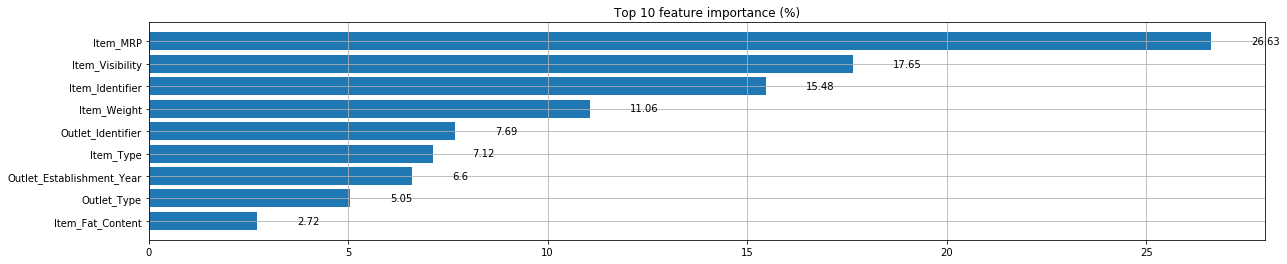


predicting...
CPU time: 0.05679821968078613 seconds

top 10 predictions :

   Item_Outlet_Sales_predicted
0                  1472.777624
1                  1320.772321
2                   609.170803
3                  2510.855661
4                  6366.136478
5                  1903.204818
6                   606.639674
7                  2234.847714
8                  1472.436550
9                  3057.383588

dumping predictions into directory : save


In [19]:
# predicting on the test dataset
Predictor().fit_predict(best,df)